<a href="https://colab.research.google.com/github/Madipadige-ManishKumar/DL_certification/blob/main/Deep_learning_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest for multi-class problems

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

print(y_pred)

# Check the accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 2 1 0 0]
Accuracy: 0.9555555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Mutli class

In [ ]:
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

features , target= make_classification(n_samples=100000,
n_features=3,
n_informative=3,
n_redundant=0,
n_classes=3,
random_state=1)
logit = LogisticRegression(max_iter=200)
scores = cross_val_score(logit,features,target,cv=10,scoring='accuracy')
print(scores)

[0.7178 0.7244 0.7171 0.7172 0.7158 0.7229 0.7157 0.7214 0.7072 0.7169]


Cross-validation scores: [0.7178 0.7244 0.7171 0.7172 0.7158 0.7229 0.7157 0.7214 0.7072 0.7169]


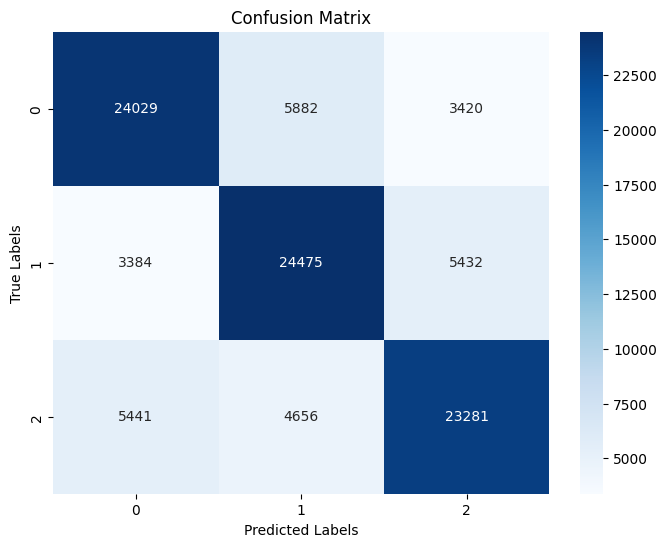

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate dataset
features, target = make_classification(n_samples=100000,
                                        n_features=3,
                                        n_informative=3,
                                        n_redundant=0,
                                        n_classes=3,
                                        random_state=1)

# Initialize Logistic Regression model
logit = LogisticRegression(max_iter=200)

# Perform cross-validation
scores = cross_val_score(logit, features, target, cv=10, scoring='accuracy')
print("Cross-validation scores:", scores)

# Fit the model and generate predictions for confusion matrix
logit.fit(features, target)
predictions = logit.predict(features)

# Compute confusion matrix
conf_matrix = confusion_matrix(target, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


[0.842 0.839 0.839 0.818 0.831 0.823 0.83  0.797 0.821 0.819]


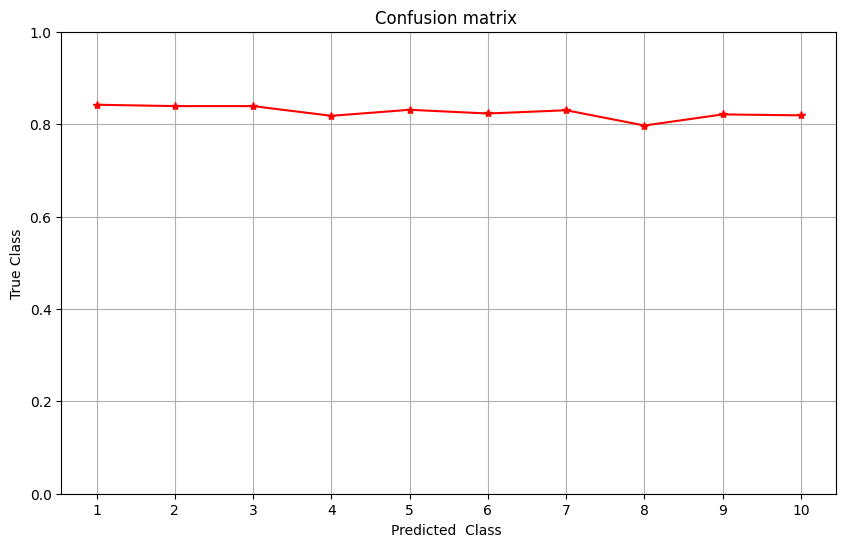

In [ ]:
### visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate dataset
features, target = make_classification(
    n_samples=10000,  # Number of samples
    n_features=3,      # Number of features
    n_informative=3,   # Number of informative features
    n_redundant=0,     # Number of redundant features
    n_classes=3,       # Number of classes
    random_state=1
)

# Initialize logistic regression model
logit = LogisticRegression(max_iter=200)

# Perform cross-validation to calculate accuracy scores
scores = cross_val_score(logit, features, target, cv=10, scoring='accuracy')

print(scores)
# Visualization of cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), scores, marker='*', linestyle='-', color='r')
plt.title('Confusion matrix ')
plt.xlabel('Predicted  Class ')
plt.ylabel('True Class')
plt.xticks(range(1, 11))
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Titanic csv file viuslzing the confusion matrix
### New Section

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
Cross-validation scores: [0.80898876 0

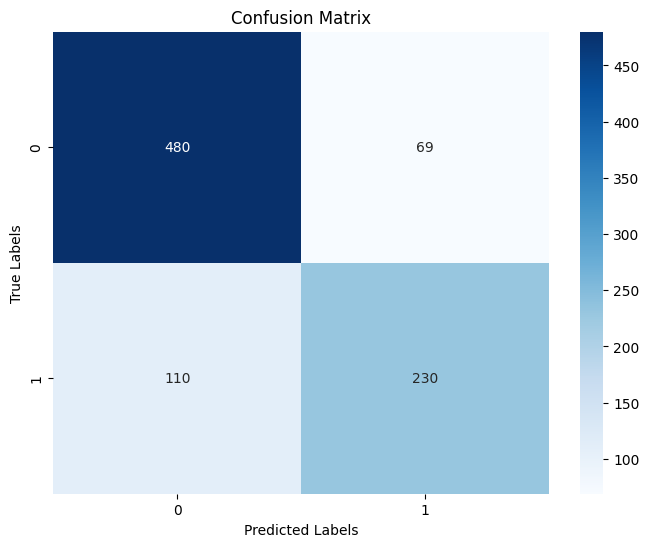

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load your CSV dataset
df = pd.read_csv('Titanic.csv')

# Check the first few rows of the dataset
print(df.head())

# Handle missing values
# Drop rows with missing values in essential columns or fill them
df = df.dropna(subset=['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked'])

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'Sex' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male=0, female=1

# Encoding 'Embarked' column
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # S=0, C=1, Q=2

# Drop non-numeric columns that are not necessary for the model (Name, Ticket, Cabin)
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Separate features and target
target_column = 'Survived'
features = df.drop(columns=[target_column])  # Drop the target column from the features
target = df[target_column]  # Target is the column we are predicting

# Initialize Logistic Regression model
logit = LogisticRegression(max_iter=200)

# Perform cross-validation
scores = cross_val_score(logit, features, target, cv=10, scoring='accuracy')
print("Cross-validation scores:", scores)

# Fit the model and generate predictions for confusion matrix
logit.fit(features, target)
predictions = logit.predict(features)

# Compute confusion matrix
conf_matrix = confusion_matrix(target, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
h = datasets.fetch_california_housing()
x= h.data
y=h.target
modelh=LinearRegression()
modelh.fit(x,y)
y1=modelh.predict([x[0]])
print(y1,"The Predicted value")
print(y[0],"The actual value  ")

x[0]


[4.13164983] The Predicted value
4.526 The actual value  


array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
interaction =PolynomialFeatures(degree=5,include_bias=False,interaction_only=True)
featureH=interaction.fit_transform(x)
poly_reg=LinearRegression()
poly_reg.fit(featureH,y)

poly_reg.predict([featureH[0]])

print(poly_reg.intercept_)
print(poly_reg.coef_)



10.547105889077404
[-6.37316626e-04 -3.54058207e-04 -6.13440564e-04 -5.60665398e-04
  1.44674639e-02  7.94470503e-05 -2.77815171e-03 -1.24926782e-02
 -7.64913831e-04 -5.33766770e-04 -1.28242513e-03  3.96941903e-02
 -1.65108800e-03 -1.85963694e-02  1.64039958e-02 -8.58496454e-03
 -4.50863173e-03 -6.17417669e-03 -5.18523153e-03  3.00456600e-02
  1.38405250e-02 -1.35213261e-03  2.16869874e-02 -1.04334519e-03
 -6.41737470e-03  1.90712735e-02 -7.30240007e-03 -8.01081054e-04
 -1.07898496e-02  2.26458311e-02  5.83064640e-02 -1.09108418e-03
  4.91000757e-04 -7.88918936e-03 -5.17252621e-02  1.98049080e-03
 -3.97073878e-03 -3.05212060e-03 -7.80654545e-04 -7.78096049e-03
 -1.21877058e-02 -4.52914679e-03 -2.73069544e-03  5.93704510e-03
 -1.75026677e-03 -1.79167879e-02 -1.38435583e-02 -6.69304035e-02
 -4.71006879e-04 -2.79214568e-02  4.60053112e-02 -4.27173618e-03
 -1.82852658e-03  2.20400075e-04 -4.97350913e-02  7.84719014e-03
 -4.91834330e-04 -2.81516787e-02 -5.76924200e-04 -3.31454889e-02
  8.64

In [ ]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
h = datasets.fetch_california_housing()
x=h.data
y=h.target
lasso =Lasso(alpha=0.1)
lasso.fit(x,y)
print(lasso.predict([x[0]]))
print(lasso.score(x,y))
print(lasso.coef_)

[3.98443921]
0.5452665703368436
[ 3.90582557e-01  1.50821512e-02 -0.00000000e+00  0.00000000e+00
  1.75019561e-05 -3.32253135e-03 -1.14214430e-01 -9.92250689e-02]


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
my_ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10], cv=5)
my_ridge_cv.fit(x,y)
my_ridge_cv.coef_
my_ridge_model=Ridge(alpha=0.1)
my_ridge_model.fit(x,y)
print("The Prediction ",my_ridge_model.predict([x[0]]))
print(my_ridge_model.score(x,y))
print(my_ridge_model.coef_)

NameError: name 'x' is not defined

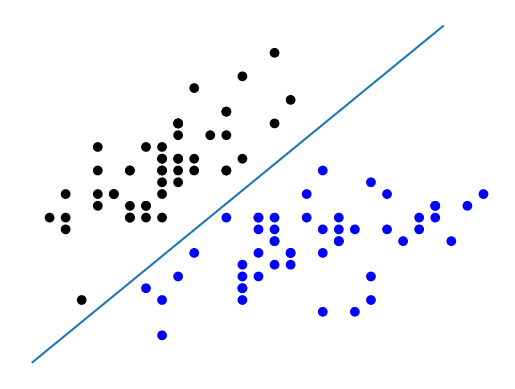

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris()
features=iris.data[:100,:2]
target = iris.target[:100]

scaler=StandardScaler()
features_standardized = scaler.fit_transform(features)
svc=LinearSVC(C=1.0)
model=svc.fit(features_standardized,target)
import matplotlib.pyplot as plt
import numpy as np
color=["black" if c==0 else "blue" for c in target]
plt.scatter(features_standardized[:,0],features_standardized[:,1],c=color)
w=model.coef_[0]
a=-(w[0]/w[1])*1.1
xx=np.linspace(-2,2)
yy=a*xx-(svc.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.axis("off"),plt.show();
# result=model.predict(model[0])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris()
features=iris.data[:100,:2]
target = iris.target[:100]

scaler=StandardScaler()
features_standardized = scaler.fit_transform(features)

svc=SVC(kernel="linear",random_state=0)
model =svc.fit(features_standardized,target)
print(model.support_vectors_)
print(model.support_)


[[-0.11120129  0.63190269]
 [-0.73768744 -0.2078351 ]
 [-0.11120129  0.63190269]
 [ 0.04542025  0.84183714]
 [-1.52079513 -1.67737625]
 [-0.89430898 -1.4674418 ]
 [-0.42444437 -0.83763845]
 [-0.11120129 -0.2078351 ]
 [ 0.82852793  0.63190269]
 [ 0.20204178 -0.2078351 ]]
[20 25 31 36 41 57 59 84 85 88]


In [ ]:
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans



iris=datasets.load_iris()
feature=iris.data

scaler=StandardScaler()
features_std=scaler.fit_transform(features)
features_std[0]
cluster=MiniBatchKMeans(n_clusters=3,random_state=0,batch_size=50)
# cluster= KMeans(n_clusters=3, random_state=0)
model=cluster.fit(features_std)
model.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris=datasets.load_iris()
features=iris.data
scaler=StandardScaler()
features_std=scaler.fit_transform(features)
cluster=DBSCAN(n_jobs=-1)
model=cluster.fit(features_std)
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [ ]:
from sklearn.cluster import AgglomerativeClustering

## `Gaussian Naive Bayes`








In [ ]:
import pandas as pd
data = pd.read_csv("obesity.csv")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

data = pd.read_csv("obesity.csv")

catagery=["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"]

label_encoder = LabelEncoder()
for i in catagery:
    data[i] = label_encoder.fit_transform(data[i])

data.head()

input_list = ["Female", "21", "1.62", "64", "yes", "no", "2", "3", "Sometimes", "no", "2", "no", "0", "1", "no", "Public_Transportation"]

output = []
# Loop through the input list and transform each element
for i in input_list:
    output.append(label_encoder.fit_transform([i])[0])
    # output.append(label_encoder.fit_transform(i))



print(output)
# l=[21,1.62,64,2,3,2,0,1]

# x=data.iloc[:,:-1].values
# y = data["NObeyesdad"]

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# model = MultinomialNB()
# model.fit(X_train,y_train)
# print(model.predict(output))

# model = MultinomialNB()
# model.fit(x,y)
# print(model.predict())

FileNotFoundError: [Errno 2] No such file or directory: 'obesity.csv'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample data
categories = ['cat', 'dog', 'rabbit', 'dog', 'cat']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the categories into numeric values
encoded_labels = label_encoder.fit_transform(categories)

# Display encoded values
print("Original Labels:", categories)
print("Encoded Labels:", encoded_labels)

# Inverse transform: Convert encoded values back to original labels
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print("Decoded Labels:", decoded_labels)


Original Labels: ['cat', 'dog', 'rabbit', 'dog', 'cat']
Encoded Labels: [0 1 2 1 0]
Decoded Labels: ['cat' 'dog' 'rabbit' 'dog' 'cat']


In [ ]:
pip list

1. CNN Has the conlution and dense part
2. where dense part require or take single dimensional array  as input
   Convolution part takes multi dimension as input


3. SoftMax deals with the multiclass >2
## 4. CNN
        1. by using the  kernel we filter and get the suitable part in the matrix . How do we know whether it is suitable for the part
        by getting the max value while mapping
        2. Kernel output's the features matrix in convolution layer
    







In [ ]:
import tensorflow as tf
import numpy as np
v1=tf.Variable(tf.constant(2.0,shape=[4],dtype="float32"))
v2 = tf.Variable(np.ones(shape=[4,3],dtype="float32"))
v2[0,0].assign(7)
print(v2)
v3 =tf.Variable(tf.keras.initializers.RandomNormal()(shape=[3,4,5,2]), dtype="float32")  # by using this we can generate any dimension matrix could say..


<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[7., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>
